# **Basic Image Processing**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import requests
import numpy as np

In [ ]:
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/taj-1.jpeg')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is
#img = cv2.imread('cats image.jpeg')

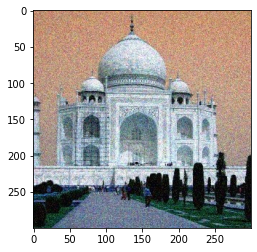

In [ ]:
plt.imshow(img)

Let’s see how the values of each pixel are given whether they are in the range of 0 to 1 or 0 to 255.

In [ ]:
img

array([[[178, 134, 105],
        [169, 124,  97],
        [197, 147, 127],
        ...,
        [189, 127, 116],
        [171, 109,  99],
        [198, 135, 127]],

       [[185, 136, 110],
        [198, 148, 125],
        [168, 117,  97],
        ...,
        [192, 135, 114],
        [191, 133, 114],
        [208, 152, 135]],

       [[182, 125, 104],
        [203, 146, 125],
        [206, 150, 131],
        ...,
        [168, 123,  86],
        [173, 128,  91],
        [218, 174, 137]],

       ...,

       [[  0,   8,   0],
        [  4,  15,   7],
        [ 10,  20,  14],
        ...,
        [ 16,  51,  41],
        [ 27,  62,  52],
        [  3,  40,  30]],

       [[  1,  18,   7],
        [ 18,  35,  24],
        [ 23,  40,  31],
        ...,
        [ 17,  43,  37],
        [ 32,  58,  52],
        [  6,  32,  26]],

       [[ 12,  34,  22],
        [ 35,  57,  45],
        [ 41,  60,  51],
        ...,
        [ 44,  64,  59],
        [ 64,  85,  82],
        [ 43,  64,  61]]

As we can see in the above tuple, the 0th index represents the height of the image’s pixel matrix, the  1st index represents the width and the last 2nd index represents the colour channel. 3 means that the image is 3 channels and it is a colour channel or RGB image. 

In [ ]:
img.shape

(300, 300, 3)

As we can see there are 2764800 pixels (which is equal to 720 X 1280 X 3) points or pixels in the image

In [ ]:
img.size

270000

 basic color conversion of the image

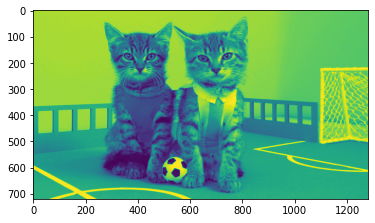

In [ ]:
# Convert to Gray
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/cat1.png')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
#img = cv2.imread('cats image.jpeg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)


## Convert to Gray
#img = cv2.imread('/content/cats image.jpeg')
#gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#cv2_imshow(gray_img)

#In another way, we can load the image itself in grey format. 
#img2 = cv2.imread('/content/cats image.jpeg', 0)
#cv2_imshow(img2)

In [ ]:
img.shape


(720, 1280, 3)

In [ ]:
b,g,r = cv2.split(img)

In [ ]:
img = cv2.merge((b,g,r))

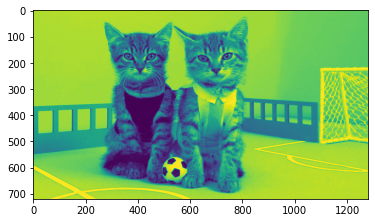

In [ ]:
plt.imshow(g)

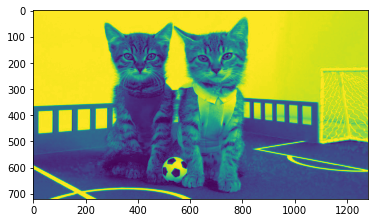

In [ ]:
plt.imshow(b)

Now we will crop the image, this can be done by just slicing the image with respect to the pixel. 

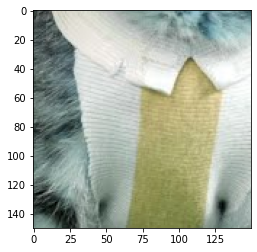

In [ ]:
# Cropping 
img3 = img[300:450, 600:750]
plt.imshow(img3)

Also, there is another way to show a particular color channel or mixture of color channels of the image. In the below code we are setting all the pixels for the blue channel to zero where ultimately our image will have only two channels red and blue which looks like below. 

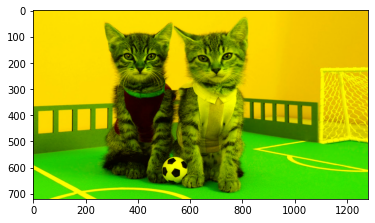

In [ ]:
img[:,:,2] = 0
plt.imshow(img)

# **Image histogram**

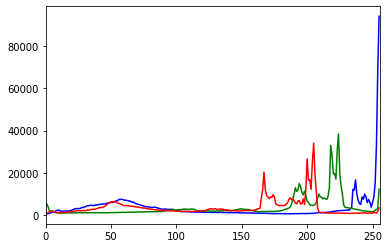

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
# Convert to Gray
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/cat1.png')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
#img = cv.imread('cats image.jpeg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

#import numpy as np
#import cv2 as cv
#from matplotlib import pyplot as plt
#img = cv.imread('/content/cats image.jpeg')
#color = ('b','g','r')
#for i,col in enumerate(color):
#histr = cv.calcHist([img],[i],None,[256],[0,256])
#plt.plot(histr,color = col)
#plt.xlim([0,256])
#plt.show()

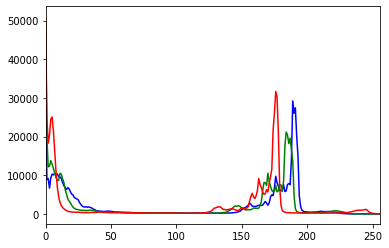

In [ ]:
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/man.jpeg')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'

#img = cv.imread('man.jpeg')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


#img = cv.imread('/content/man.jpeg')
#for i,col in enumerate(color):
#histr = cv.calcHist([img],[i],None,[256],[0,256])
#plt.plot(histr,color = col)
#plt.xlim([0,256])
#plt.show()

# **Geographical operation**

Now we will see some of the geographical operations like the rotation of images, image translation etc. Let’s first see how to rotate the given image. We are aiming to rotate the image on the central point about 45 degrees. To rotate the image we will be using open cv’s getRotationMatrix2D and warpAffine function.

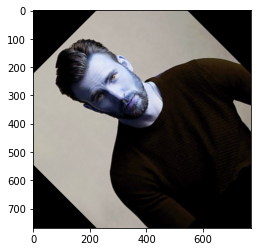

In [ ]:
# Image rotation
height, width = img.shape[:2]
center = (width/2, height/2)

rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
plt.imshow(rotated_image)

#img = cv2.imread('/content/cats image.jpeg')
# Image rotation
#height, width = img.shape[:2]
#center = (width/2, height/2)
#rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)
#rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))
#cv2_imshow(rotated_image)

Now next is image translation, where will push the image diagonally down. 

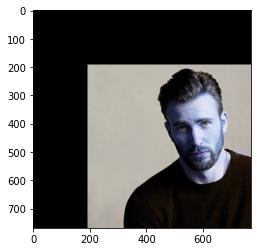

In [ ]:
# Image translation
import numpy as np
tx, ty = width / 4, height / 4

translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

translated_image = cv2.warpAffine(src=img, M=translation_matrix, dsize=(width, height))

plt.imshow(translated_image)

# **Image Annotation**

In this part on Image annotation, we will perform some operations on a given image such as drawing a line, circle or rectangle, etc. Here, first, we will draw a circle surrounding the cat’s face. 

# **Circle drawing**

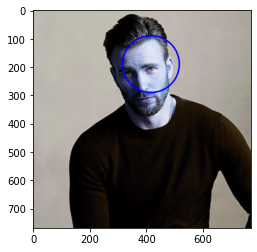

In [ ]:
# center of circle
circle_center = (415,190)
# define the radius of the circle
radius =100
#  Draw a circle using the circle() Function
cv2.circle(img, circle_center, radius, (0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
# Display the result
plt.imshow(img)


# Center of circle
#circle_center = (415,190)
# define the radius of the circle
#radius =100
#  Draw a circle using the circle() Function
#cv2.circle(img, circle_center, radius, (0, 0, 255), thickness=3, lineType=cv2.LINE_AA)
# Display the result
#cv2_imshow(img)

# **Rectangle drawing**

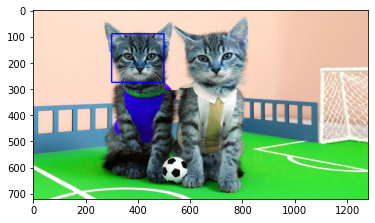

In [ ]:
# Convert to Gray
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/cat1.png')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
#img = cv2.imread('cats image.jpeg')
# starting and end points of the rectangle
start_point =(300,90) #top left
end_point =(500,275) #bottom right
# draw the rectangle
cv2.rectangle(img, start_point, end_point, (0, 0, 255), thickness= 3, lineType=cv2.LINE_8) 
# display the output
plt.imshow(img)


# Rectangle drawing
#img = cv2.imread('/content/cats image.jpeg')
# starting and end points of the rectangle
#start_point =(300,90) #top left
#end_point =(500,275) #bottom right
# Draw the rectangle
#cv2.rectangle(img, start_point, end_point, (0, 0, 255), thickness= 3, lineType=cv2.LINE_8)
# display the output
#cv2_imshow(img)

# **Edge detection**

The canny detection algorithm performs well to detect edges in background and foreground objects as we can see above. 

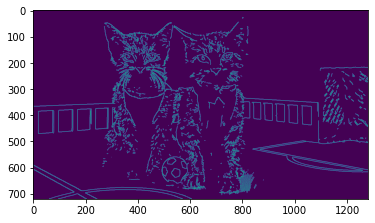

In [ ]:
# Canny algorithm
# Convert to Gray
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/cat1.png')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
#img = cv2.imread('cats image.jpeg')
edges = cv2.Canny(img,200,300,True)
plt.imshow(edges)



## Canny algorithm
#img = cv2.imread('/content/cats image.jpeg')
#edges = cv2.Canny(img,200,300,True)
#cv2_imshow(edges)

As we can see, the Sobel detection detects the deep edges of foreground objects but not the background object. 

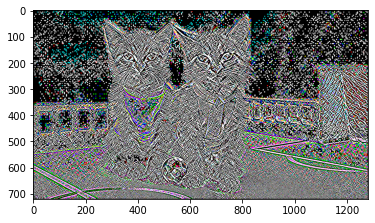

In [ ]:
# Read the original image
# Convert to Gray
req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/cat1.png')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1) # 'Load it as it is'
#img = cv2.imread('cats image.jpeg')

sobel_edge = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
plt.imshow(sobel_edge)


# Read the original image
#img = cv2.imread('/content/cats image.jpeg')
#sobel_edge = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
#cv2_imshow(sobel_edge)

# **Contour Detection**

In this part of the implementation, we will learn to detect the contour in a given image. We need to first convert the image into a binary image then a suitable contour detection algorithm is applied to it.

In [ ]:
img = cv2.imread('/content/cats image.jpeg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply binary thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
cv2_imshow(thresh)

Above we can see the binary form of the image. Now let’s use this image to create contour over it.

In [ ]:
# Detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# See the results
cv2_imshow(img)

# **Face Detection**

In [ ]:
import tensorflow as tf

In [ ]:
face = tf.keras.utils.get_file('haarcascade_frontalface_default.xml','https://github.com/analyticsindiamagazine/MocksDatasets/blob/main/haarcascade_frontalface_default.xml?raw=true')
eye = tf.keras.utils.get_file('haarcascade_eye.xml','https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/haarcascade_eye.xml')

352256/341406 [==============================] - 0s 0us/step


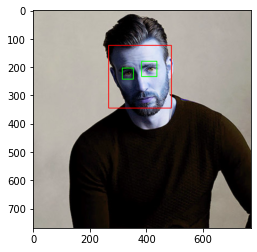

In [ ]:
import numpy as np
import cv2
import requests
face_cascade = cv2.CascadeClassifier(face)
eye_cascade = cv2.CascadeClassifier(eye)

req = requests.get('https://analyticsindiamag.com/wp-content/uploads/2022/06/man.jpeg')
arr = np.asarray(bytearray(req.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1)
#img = cv2.imread('man.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img)

In [ ]:
import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
img = cv2.imread('man.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
roi_gray = gray[y:y+h, x:x+w]
roi_color = img[y:y+h, x:x+w]
eyes = eye_cascade.detectMultiScale(roi_gray)
for (ex,ey,ew,eh) in eyes:
     cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2_imshow(img)